In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [2]:
mnist = keras.datasets.mnist
class_names = [str(i) for i in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

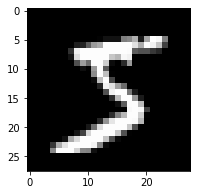

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

img = x_train[0]
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

conv2d.shape (1, 14, 14, 5)


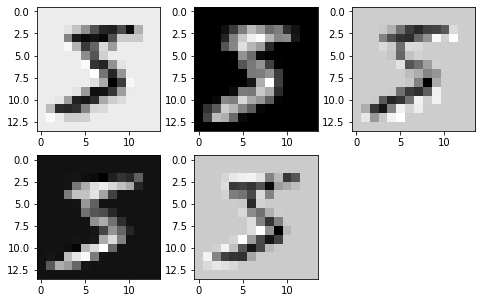

In [4]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=2,
                             padding='same',
                             kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3)
plt.figure(figsize=(8,5))
for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

pool.shape (1, 7, 7, 5)


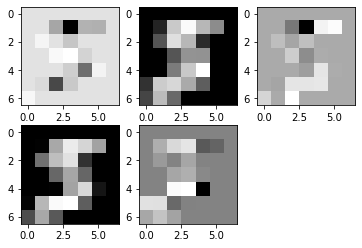

In [5]:
pool = keras.layers.MaxPool2D(pool_size=2, strides=2,
                              padding='same')(conv2d)
print('pool.shape', pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()